In [24]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the dataset

df = pd.read_csv('data/raw/pharma_spending_data.csv')

In [ ]:
# Exclude specific countries
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']

# Clean 'LOCATION' column (strip spaces and convert to uppercase for comparison)
df['LOCATION'] = df['LOCATION'].str.strip().str.upper()

# Convert 'TIME' column to datetime (if it's not already)
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')

# Extract the year from the 'TIME' column
df['Year'] = df['TIME'].dt.year

# Filter data for years 2005 to 2015 and exclude the specified countries
filtered_data = df[
    (df['Year'] >= 2005) & 
    (df['Year'] <= 2015) & 
    (~df['LOCATION'].isin([country.upper() for country in excluded_countries]))  # Ensure exclusion is case insensitive
]

In [ ]:
# Group by 'LOCATION' and calculate the mean for specific columns and sum for TOTAL_SPEND
aggregated_data = filtered_data.groupby('LOCATION').agg(
    PC_HEALTHXP=('PC_HEALTHXP', 'mean'),
    PC_GDP=('PC_GDP', 'mean'),
    USD_CAP=('USD_CAP', 'mean'),
    TOTAL_SPEND=('TOTAL_SPEND', 'sum')
)

# Sort by USD_CAP to get the top 10 countries
top_10 = aggregated_data.sort_values(by='USD_CAP', ascending=True).head(10)

# Display the result
print("Bottom 10 countries are:")
print("(The data is based on mean of PC_HEALTHXP, PC_GDP, USD_CAP, and sum of TOTAL_SPEND for each country)")
print(bottom_10)


In [ ]:
# Group by 'LOCATION' and calculate the mean for specific columns and sum for TOTAL_SPEND
aggregated_data = filtered_data.groupby('LOCATION').agg(
    PC_HEALTHXP=('PC_HEALTHXP', 'mean'),
    PC_GDP=('PC_GDP', 'mean'),
    USD_CAP=('USD_CAP', 'mean'),
    TOTAL_SPEND=('TOTAL_SPEND', 'sum')
)

# Sort by USD_CAP to get the top 10 countries
top_10 = aggregated_data.sort_values(by='USD_CAP', ascending=False).head(10)

# Display the result
print("Top 10 countries are:")
print("(The data is based on mean of PC_HEALTHXP, PC_GDP, USD_CAP, and sum of TOTAL_SPEND for each country)")
print(top_10)


In [25]:
# Filter data for years 2005 to 2015
filtered_data = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2015)]

# Group by 'LOCATION' and calculate the mean for specific columns and sum for TOTAL_SPEND
aggregated_data = filtered_data.groupby('LOCATION').agg(
    PC_HEALTHXP=('PC_HEALTHXP', 'mean'),
    PC_GDP=('PC_GDP', 'mean'),
    USD_CAP=('USD_CAP', 'mean'),
    TOTAL_SPEND=('TOTAL_SPEND', 'sum')
)

# Sort by USD_CAP to get the top 10 countries
top_10 = aggregated_data.sort_values(by='USD_CAP', ascending=False).head(10)

# Display the result
print("Top 10 countries are:")
print("(The data is based on mean of PC_HEALTHXP, PC_GDP,  USD_CAP and sum of TOTAL_SPEND for each country)")
print(top_10)


Top 10 countries are:
(The data is based on mean of PC_HEALTHXP, PC_GDP,  USD_CAP and sum of TOTAL_SPEND for each country)
          PC_HEALTHXP    PC_GDP     USD_CAP  TOTAL_SPEND
LOCATION                                                
USA         12.127091  1.922909  958.304909   3262554.09
CHE         12.439818  1.341273  733.046273     63826.93
CAN         17.971500  1.774000  720.361100    244457.45
GRC         26.767100  2.372300  646.827100     71289.29
JPN         19.636500  1.818700  646.764700    826362.76
IRL         14.931818  1.369545  640.195909     31784.02
DEU         14.747818  1.574091  639.653000    573300.17
FRA         16.228273  1.714364  622.072000    445143.27
BEL         15.486909  1.511000  602.866455     72430.33
LUX          9.407909  0.622364  574.621909      3234.60


In [28]:
# Filter data for years 2005 to 2015
filtered_data = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2014)]

# Group by 'LOCATION' and calculate the mean for specific columns and sum for TOTAL_SPEND
aggregated_data = filtered_data.groupby('LOCATION').agg(
    PC_HEALTHXP=('PC_HEALTHXP', 'mean'),
    PC_GDP=('PC_GDP', 'mean'),
    USD_CAP=('USD_CAP', 'mean'),
    TOTAL_SPEND=('TOTAL_SPEND', 'sum')
)

# Sort by USD_CAP to get the bottom 10 countries
bottom_10 = aggregated_data.sort_values(by='USD_CAP', ascending=True).head(10)

# Display the result
print("Bottom 10 countries are:")
print("(The data is based on mean of PC_HEALTHXP, PC_GDP,  USD_CAP and sum of TOTAL_SPEND for each country)")
print(bottom_10)


Bottom 10 countries are:
(The data is based on mean of PC_HEALTHXP, PC_GDP,  USD_CAP and sum of TOTAL_SPEND for each country)
          PC_HEALTHXP    PC_GDP     USD_CAP  TOTAL_SPEND
LOCATION                                                
NZL         10.799667  0.908667  250.837333      3147.40
LVA         24.861900  1.420400  269.196400      5662.78
EST         20.681000  1.179400  269.575900      3588.04
ISR         13.416000  0.942500  274.791375     16654.40
MEX         31.267700  1.837900  277.979500    323685.77
POL         24.820800  1.531800  304.320700    115906.72
DNK          7.868800  0.776400  324.135200     17938.22
LTU         28.429600  1.777400  373.809400     11572.29
CZE         21.182300  1.442100  395.318600     41185.90
NOR          8.149200  0.699200  412.787900     20135.20


In [29]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact

# Filter data for years 2005 to 2015
filtered_data = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2015)]

# Group by 'LOCATION' and calculate the mean for specific columns and sum for TOTAL_SPEND
aggregated_data = filtered_data.groupby('LOCATION').agg(
    PC_HEALTHXP=('PC_HEALTHXP', 'mean'),
    PC_GDP=('PC_GDP', 'mean'),
    USD_CAP=('USD_CAP', 'mean'),
    TOTAL_SPEND=('TOTAL_SPEND', 'sum')
)

# Sort by USD_CAP to get the top 10 countries
top_10 = aggregated_data.sort_values(by='USD_CAP', ascending=False).head(10).reset_index()

# Function to plot dynamic graphs
def plot_top_10(column='PC_HEALTHXP'):
    fig = px.bar(
        top_10,
        x='LOCATION',
        y=column,
        title=f'Top 10 Countries by {column}',
        labels={'LOCATION': 'Country', column: column},
        text=column
    )
    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig.update_layout(yaxis_title=column, xaxis_title='Country', showlegend=False)
    fig.show()

# Create an interactive widget for selecting columns
interact(plot_top_10, column=['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND'])


interactive(children=(Dropdown(description='column', options=('PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND…

<function __main__.plot_top_10(column='PC_HEALTHXP')>

In [30]:
import pandas as pd
import plotly.express as px

# Filter data for the years 2005 to 2015
df_filtered = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2015)]

# Group by LOCATION and calculate the mean for relevant columns
aggregated_data = df_filtered.groupby('LOCATION').agg(
    PC_HEALTHXP=('PC_HEALTHXP', 'mean'),
    PC_GDP=('PC_GDP', 'mean'),
    USD_CAP=('USD_CAP', 'mean'),
    TOTAL_SPEND=('TOTAL_SPEND', 'sum')
).reset_index()

# Sort and get top 10 countries based on USD_CAP mean
top_10 = aggregated_data.sort_values(by='USD_CAP', ascending=False).head(10)

# Function for creating a dynamic plot
def create_dynamic_plot(data, column):
    fig = px.bar(data, x='LOCATION', y=column, title=f'Top 10 Countries by {column}', text=column)
    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig.update_layout(
        xaxis_title="Country",
        yaxis_title=column,
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    fig.show()

# Dynamic plot options
print("Select one of the following columns to plot:")
print("1. PC_HEALTHXP")
print("2. PC_GDP")
print("3. USD_CAP")
print("4. TOTAL_SPEND")

# Get user input for the column to plot
choice = input("Enter the column name (e.g., PC_HEALTHXP): ")

# Validate input and create the plot
if choice in top_10.columns:
    create_dynamic_plot(top_10, choice)
else:
    print("Invalid column name. Please choose from the listed options.")


Select one of the following columns to plot:
1. PC_HEALTHXP
2. PC_GDP
3. USD_CAP
4. TOTAL_SPEND


Invalid column name. Please choose from the listed options.


In [7]:
import pandas as pd
import plotly.express as px

# Filter data for the years 2005 to 2015
df_filtered = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2015)]

# Group by LOCATION and calculate the mean for relevant columns
aggregated_data = df_filtered.groupby('LOCATION').agg(
    PC_HEALTHXP=('PC_HEALTHXP', 'mean'),
    PC_GDP=('PC_GDP', 'mean'),
    USD_CAP=('USD_CAP', 'mean'),
    TOTAL_SPEND=('TOTAL_SPEND', 'sum')
).reset_index()

# Sort and get bottom 10 countries based on USD_CAP mean
bottom_10 = aggregated_data.sort_values(by='USD_CAP', ascending=True).head(10)

# Function for creating a dynamic plot
def create_dynamic_plot(data, column):
    fig = px.bar(data, x='LOCATION', y=column, title=f'Bottom 10 Countries by {column}', text=column)
    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig.update_layout(
        xaxis_title="Country",
        yaxis_title=column,
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    fig.show()

# Dynamic plot options
print("Select one of the following columns to plot:")
print("1. PC_HEALTHXP")
print("2. PC_GDP")
print("3. USD_CAP")
print("4. TOTAL_SPEND")

# Get user input for the column to plot
choice = input("Enter the column name (e.g., PC_HEALTHXP): ")

# Validate input and create the plot
if choice in bottom_10.columns:
    create_dynamic_plot(bottom_10, choice)
else:
    print("Invalid column name. Please choose from the listed options.")


Select one of the following columns to plot:
1. PC_HEALTHXP
2. PC_GDP
3. USD_CAP
4. TOTAL_SPEND


In [8]:
import pandas as pd
import plotly.express as px

# Filter data for the years 2005 to 2015
df_filtered = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2015)]

# Group by LOCATION and calculate the mean for relevant columns
aggregated_data = df_filtered.groupby('LOCATION').agg(
    PC_HEALTHXP=('PC_HEALTHXP', 'mean'),
    PC_GDP=('PC_GDP', 'mean'),
    USD_CAP=('USD_CAP', 'mean'),
    TOTAL_SPEND=('TOTAL_SPEND', 'sum')
).reset_index()

# Sort and get top 10 countries based on USD_CAP mean
top_10 = aggregated_data.sort_values(by='USD_CAP', ascending=False).head(10)

# Function for creating a dynamic plot for top 10 based on user input
def create_dynamic_plot(data, country, column):
    # Filter the data based on the selected country and column
    country_data = df_filtered[df_filtered['LOCATION'] == country]
    
    # Check if the selected column exists
    if column in country_data.columns:
        fig = px.line(country_data, x='TIME', y=column, title=f'{column} for {country} Over Time', markers=True)
        fig.update_layout(
            xaxis_title="Year",
            yaxis_title=column,
            showlegend=False
        )
        fig.show()
    else:
        print(f"Column {column} does not exist in the data for {country}.")

# Dynamic plot options for top 10
print("Select one of the following columns to plot for the Top 10 countries:")
print("1. PC_HEALTHXP")
print("2. PC_GDP")
print("3. USD_CAP")
print("4. TOTAL_SPEND")

# Get user input for the column to plot
column_choice = input("Enter the column name (e.g., PC_HEALTHXP): ")

# Display top 10 countries and ask for the country name
print("\nTop 10 Countries:")
print(top_10['LOCATION'].tolist())

country_choice = input("\nEnter the country name from the above list: ")

# Validate input for the country and column
if country_choice in top_10['LOCATION'].values and column_choice in df_filtered.columns:
    create_dynamic_plot(df_filtered, country_choice, column_choice)
else:
    print("Invalid input. Please ensure the country is in the Top 10 list and the column name is correct.")


Select one of the following columns to plot for the Top 10 countries:
1. PC_HEALTHXP
2. PC_GDP
3. USD_CAP
4. TOTAL_SPEND

Top 10 Countries:
['USA', 'CHE', 'CAN', 'GRC', 'JPN', 'IRL', 'DEU', 'FRA', 'BEL', 'LUX']


In [31]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Filter data for the years 2005 to 2015
df_filtered = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2015)]

# Group by LOCATION and calculate the mean for relevant columns
aggregated_data = df_filtered.groupby('LOCATION').agg(
    PC_HEALTHXP=('PC_HEALTHXP', 'mean'),
    PC_GDP=('PC_GDP', 'mean'),
    USD_CAP=('USD_CAP', 'mean'),
    TOTAL_SPEND=('TOTAL_SPEND', 'sum')
).reset_index()

# Sort and get top 10 countries based on USD_CAP mean
top_10 = aggregated_data.sort_values(by='USD_CAP', ascending=False).head(10)

# Initialize Dash app
app = dash.Dash(__name__)

# Layout for the Dash app
app.layout = html.Div([
    html.H1("Dynamic Plot for Top 10 Countries"),

    # Dropdown for selecting column
    html.Label("Select Column to Plot:"),
    dcc.Dropdown(
        id='column-dropdown',
        options=[
            {'label': 'PC_HEALTHXP', 'value': 'PC_HEALTHXP'},
            {'label': 'PC_GDP', 'value': 'PC_GDP'},
            {'label': 'USD_CAP', 'value': 'USD_CAP'},
            {'label': 'TOTAL_SPEND', 'value': 'TOTAL_SPEND'}
        ],
        value='PC_HEALTHXP'  # default value
    ),

    # Dropdown for selecting country
    html.Label("Select Country:"),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in top_10['LOCATION'].tolist()],
        value=top_10['LOCATION'].iloc[0]  # default value (first country in top 10)
    ),

    # Graph to display the plot
    dcc.Graph(id='dynamic-plot')
])

# Callback function to update plot based on user inputs
@app.callback(
    Output('dynamic-plot', 'figure'),
    [Input('country-dropdown', 'value'),
     Input('column-dropdown', 'value')]
)
def update_plot(country, column):
    # Filter the data for the selected country
    country_data = df_filtered[df_filtered['LOCATION'] == country]

    # Create the plot for the selected column
    fig = px.line(country_data, x='TIME', y=column, title=f'{column} for {country} Over Time', markers=True)

    # Update layout for the plot
    fig.update_layout(
        xaxis_title="Year",
        yaxis_title=column,
        showlegend=False
    )

    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

In [13]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output


# Filter data for the years 2005 to 2015
df_filtered = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2015)]

# Group by LOCATION and calculate the mean for relevant columns
aggregated_data = df_filtered.groupby('LOCATION').agg(
    PC_HEALTHXP=('PC_HEALTHXP', 'mean'),
    PC_GDP=('PC_GDP', 'mean'),
    USD_CAP=('USD_CAP', 'mean'),
    TOTAL_SPEND=('TOTAL_SPEND', 'sum')
).reset_index()

# Sort and get bottom 10 countries based on USD_CAP mean
bottom_10 = aggregated_data.sort_values(by='USD_CAP', ascending=True).head(10)

# Initialize Dash app
app = dash.Dash(__name__)

# Layout for the Dash app
app.layout = html.Div([
    html.H1("Dynamic Plot for Bottom 10 Countries"),

    # Dropdown for selecting column
    html.Label("Select Column to Plot:"),
    dcc.Dropdown(
        id='column-dropdown',
        options=[
            {'label': 'PC_HEALTHXP', 'value': 'PC_HEALTHXP'},
            {'label': 'PC_GDP', 'value': 'PC_GDP'},
            {'label': 'USD_CAP', 'value': 'USD_CAP'},
            {'label': 'TOTAL_SPEND', 'value': 'TOTAL_SPEND'}
        ],
        value='PC_HEALTHXP'  # default value
    ),

    # Dropdown for selecting country
    html.Label("Select Country:"),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in bottom_10['LOCATION'].tolist()],
        value=bottom_10['LOCATION'].iloc[0]  # default value (first country in bottom 10)
    ),

    # Graph to display the plot
    dcc.Graph(id='dynamic-plot')
])

# Callback function to update plot based on user inputs
@app.callback(
    Output('dynamic-plot', 'figure'),
    [Input('country-dropdown', 'value'),
     Input('column-dropdown', 'value')]
)
def update_plot(country, column):
    # Filter the data for the selected country
    country_data = df_filtered[df_filtered['LOCATION'] == country]

    # Create the plot for the selected column
    fig = px.line(country_data, x='TIME', y=column, title=f'{column} for {country} Over Time', markers=True)

    # Update layout for the plot
    fig.update_layout(
        xaxis_title="Year",
        yaxis_title=column,
        showlegend=False
    )

    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


c:\Users\khali\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\khali\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\khali\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\khali\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\khali\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\khali\miniconda3\envs\dsi_participant\lib\site

   LOCATION  TIME  Predicted_TOTAL_SPEND       Lower_CI       Upper_CI
0       AUS  2017           16805.405636   16244.664364   17366.146909
1       AUT  2017            5690.882182    5475.076541    5906.687823
2       BEL  2017            8138.572909    7852.139917    8425.005901
3       CAN  2017           31976.147273   30267.798477   33684.496068
4       CZE  2017            4848.794091    4411.236522    5286.351660
5       DNK  2017            2069.439636    1908.313439    2230.565834
6       FIN  2017            2878.080545    2754.155472    3002.005619
7       FRA  2017           47168.152636   45917.487185   48418.818088
8       DEU  2017           65192.238545   62432.904810   67951.572281
9       GRC  2017            6940.910417    5026.989177    8854.831657
10      HUN  2017            6052.744091    5491.713293    6613.774889
11      ISL  2017             171.329000     152.612015     190.045985
12      IRL  2017            3676.188273    3347.901548    4004.474998
13    

ValueError: num must be an integer with 1 <= num <= 12, not 13

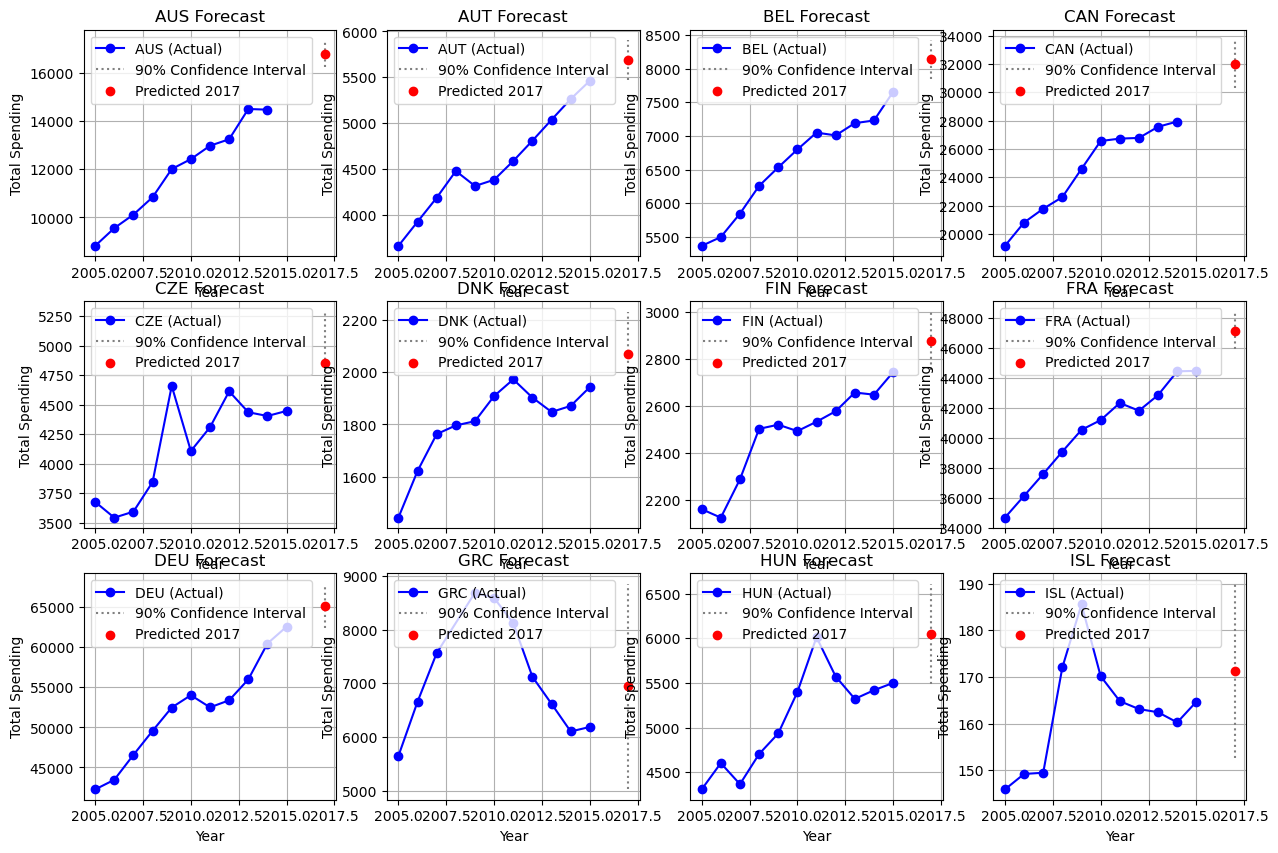

In [20]:
# Filter the data to only include years 2005-2015
df_filtered_years = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2015)]

# List of countries to exclude
countries_to_exclude = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']

# Filter out the countries by location (remove rows with specified countries)
df_filtered_excluded = df_filtered_years[~df_filtered_years['LOCATION'].isin(countries_to_exclude)]

# Filter the dataset for the years 2005-2015
df_filtered_excluded_2005_2015 = df_filtered_excluded[(df_filtered_excluded['TIME'] >= 2005) & 
                                                       (df_filtered_excluded['TIME'] <= 2015)]

# Exclude specific countries (RUS, TUR, GBR, NZL, ISR)
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']
df_filtered_excluded_2005_2015 = df_filtered_excluded_2005_2015[~df_filtered_excluded_2005_2015['LOCATION'].isin(excluded_countries)]

# Prepare the feature (X) and target (y) for the linear regression model
# We will use 'TIME' as the feature and 'TOTAL_SPEND' as the target
df_selected_countries = df_filtered_excluded_2005_2015[['LOCATION', 'TIME', 'TOTAL_SPEND']]
df_selected_countries = df_selected_countries.dropna()  # Remove rows with missing data



# Forecast TOTAL_SPEND for 2017 for each country
predictions = []

# Initialize a Linear Regression model
model = LinearRegression()

# Iterate through each country in the filtered dataset
for country in df_selected_countries['LOCATION'].unique():
    # Filter data for each country
    country_data = df_selected_countries[df_selected_countries['LOCATION'] == country]
    
    # Features (X) are the years (TIME), target (y) is the TOTAL_SPEND
    X = country_data[['TIME']]  # Independent variable (time)
    y = country_data['TOTAL_SPEND']  # Dependent variable (total spend)
    
    # Train the linear regression model
    model.fit(X, y)
    
    # Predict for 2017
    prediction_2017 = model.predict(np.array([[2017]]))  # Change year to 2017
    
    # Calculate the 90% confidence interval using statsmodels OLS
    X_with_const = sm.add_constant(X)  # Add a constant for intercept
    model_sm = sm.OLS(y, X_with_const).fit()  # Fit the OLS model for confidence interval
    pred_ci = model_sm.get_prediction(np.array([[1, 2017]]))  # Get prediction and confidence interval for 2017
    
    # Store the result along with confidence intervals
    lower_ci = pred_ci.conf_int()[0][0]  # Lower bound of the 90% CI
    upper_ci = pred_ci.conf_int()[0][1]  # Upper bound of the 90% CI
    predictions.append({
        'LOCATION': country,
        'TIME': 2017,
        'Predicted_TOTAL_SPEND': prediction_2017[0],
        'Lower_CI': lower_ci,
        'Upper_CI': upper_ci,
    })

# Create a DataFrame to store the results
forecast_df_2017 = pd.DataFrame(predictions)

# Display the forecast results for 2017
print(forecast_df_2017)

# Step 2: Visualize the forecasts with confidence intervals

# Create a figure for the overall plots
plt.figure(figsize=(15, 10))

# Iterate through each country for plotting
for i, country in enumerate(forecast_df_2017['LOCATION']):
    country_data = df_selected_countries[df_selected_countries['LOCATION'] == country]
    
    # Create a new subplot for each country
    plt.subplot(3, 4, i + 1)  # Create a grid of 3x4 subplots (adjust based on number of countries)
    
    # Plot the actual data points for the country
    plt.plot(country_data['TIME'], country_data['TOTAL_SPEND'], label=f"{country} (Actual)", marker='o', color='blue')
    
    # Get the forecasted value and confidence intervals for 2017
    forecast_row = forecast_df_2017[forecast_df_2017['LOCATION'] == country]
    predicted_value = forecast_row['Predicted_TOTAL_SPEND'].values[0]
    lower_ci = forecast_row['Lower_CI'].values[0]
    upper_ci = forecast_row['Upper_CI'].values[0]
    
    # Plot the forecast with dotted lines for the confidence bands
    plt.plot([2017, 2017], [lower_ci, upper_ci], linestyle=':', color='gray', label='90% Confidence Interval')
    
    # Plot the forecast point (2017) as a red marker
    plt.scatter([2017], [predicted_value], color='red', zorder=5, label='Predicted 2017')
    
    # Customize the plot
    plt.title(f'{country} Forecast')
    plt.xlabel('Year')
    plt.ylabel('Total Spending')
    plt.legend(loc='upper left')
    plt.grid(True)

# Adjust the layout to prevent overlapping plots
plt.tight_layout()

# Show the plots
plt.show()

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import ipywidgets as widgets
from ipywidgets import interact


# Clean column names (remove leading/trailing spaces if any)
df.columns = df.columns.str.strip()

# Dropdown for selecting the column (you can add more columns if needed)
columns = ['TOTAL_SPEND', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP']

# Dropdown for selecting the country (location)
locations = df['LOCATION'].unique()

# Forecasting function for the selected location and column
def forecast_for_location(selected_location, selected_column):
    # Filter data for the selected location
    country_data = df[df['LOCATION'] == selected_location]
    
    # Features (X) are the years (TIME), target (y) is the selected column
    X = country_data[['TIME']]  # Independent variable (time)
    y = country_data[selected_column]  # Dependent variable (selected column)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for 2017
    prediction_2017 = model.predict(np.array([[2017]]))  # Predict for 2017
    
    # Calculate the 90% confidence interval using statsmodels OLS
    X_with_const = sm.add_constant(X)  # Add a constant for intercept
    model_sm = sm.OLS(y, X_with_const).fit()  # Fit the OLS model for confidence interval
    pred_ci = model_sm.get_prediction(np.array([[1, 2017]]))  # Get prediction and confidence interval for 2017
    
    # Get the confidence intervals
    lower_ci = pred_ci.conf_int()[0][0]  # Lower bound of the 90% CI
    upper_ci = pred_ci.conf_int()[0][1]  # Upper bound of the 90% CI
    
    # Create a DataFrame to store the results for 2017
    forecast_df_2017 = pd.DataFrame({
        'LOCATION': [selected_location],
        'TIME': [2017],
        'Predicted_VALUE': [prediction_2017[0]],
        'Lower_CI': [lower_ci],
        'Upper_CI': [upper_ci],
    })
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    
    # Plot the actual data points for the selected country
    plt.plot(country_data['TIME'], country_data[selected_column], label=f"{selected_location} (Actual)", marker='o', color='blue')
    
    # Plot the forecast with confidence intervals for 2017
    plt.plot([2017, 2017], [lower_ci, upper_ci], linestyle=':', color='gray', label='90% Confidence Interval')
    plt.scatter([2017], [prediction_2017[0]], color='red', zorder=5, label='Predicted 2017')
    
    # Customize the plot
    plt.title(f'{selected_location} Forecast for {selected_column}')
    plt.xlabel('Year')
    plt.ylabel(f'{selected_column} Value')
    plt.legend(loc='upper left')
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Create dropdown widgets for selecting country and column
location_dropdown = widgets.Dropdown(
    options=locations,
    description='Location:',
    value=locations[0]  # Default value
)

column_dropdown = widgets.Dropdown(
    options=columns,
    description='Column:',
    value='TOTAL_SPEND'  # Default value
)

# Use interact to link the dropdown selections to the forecasting and plotting function
interact(forecast_for_location, selected_location=location_dropdown, selected_column=column_dropdown)


interactive(children=(Dropdown(description='Location:', options=('AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FI…

<function __main__.forecast_for_location(selected_location, selected_column)>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import ipywidgets as widgets
from ipywidgets import interact


# Clean column names (remove leading/trailing spaces if any)
df.columns = df.columns.str.strip()

# Dropdown for selecting the column (you can add more columns if needed)
columns = ['TOTAL_SPEND', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP']

# Dropdown for selecting the country (location)
locations = df['LOCATION'].unique()

# Forecasting function for the selected location and column
def forecast_for_location(selected_location, selected_column):
    # Filter data for the selected location
    country_data = df[df['LOCATION'] == selected_location]
    
    # Features (X) are the years (TIME), target (y) is the selected column
    X = country_data[['TIME']]  # Independent variable (time)
    y = country_data[selected_column]  # Dependent variable (selected column)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for 2016 and 2017
    prediction_2016 = model.predict(np.array([[2016]]))  # Predict for 2016
    prediction_2017 = model.predict(np.array([[2017]]))  # Predict for 2017
    
    # Calculate the 90% confidence interval using statsmodels OLS
    X_with_const = sm.add_constant(X)  # Add a constant for intercept
    model_sm = sm.OLS(y, X_with_const).fit()  # Fit the OLS model for confidence interval
    pred_ci_2016 = model_sm.get_prediction(np.array([[1, 2016]]))  # Get prediction and confidence interval for 2016
    pred_ci_2017 = model_sm.get_prediction(np.array([[1, 2017]]))  # Get prediction and confidence interval for 2017
    
    # Get the confidence intervals
    lower_ci_2016, upper_ci_2016 = pred_ci_2016.conf_int()[0]
    lower_ci_2017, upper_ci_2017 = pred_ci_2017.conf_int()[0]
    
    # Create a DataFrame to store the results for 2016 and 2017
    forecast_df = pd.DataFrame({
        'LOCATION': [selected_location, selected_location],
        'TIME': [2016, 2017],
        'Predicted_VALUE': [prediction_2016[0], prediction_2017[0]],
        'Lower_CI': [lower_ci_2016, lower_ci_2017],
        'Upper_CI': [upper_ci_2016, upper_ci_2017],
    })
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    
    # Plot the actual data points for the selected country
    plt.plot(country_data['TIME'], country_data[selected_column], label=f"{selected_location} (Actual)", marker='o', color='blue')
    
    # Plot the forecast for 2016 with confidence interval
    plt.plot([2016, 2016], [lower_ci_2016, upper_ci_2016], linestyle=':', color='gray', label='2016 90% Confidence Interval')
    plt.scatter([2016], [prediction_2016[0]], color='red', zorder=5, label='Predicted 2016')
    
    # Plot the forecast for 2017 with confidence interval
    plt.plot([2017, 2017], [lower_ci_2017, upper_ci_2017], linestyle=':', color='gray', label='2017 90% Confidence Interval')
    plt.scatter([2017], [prediction_2017[0]], color='green', zorder=5, label='Predicted 2017')
    
    # Customize the plot
    plt.title(f'{selected_location} Forecast for {selected_column}')
    plt.xlabel('Year')
    plt.ylabel(f'{selected_column} Value')
    plt.legend(loc='upper left')
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Create dropdown widgets for selecting country and column
location_dropdown = widgets.Dropdown(
    options=locations,
    description='Location:',
    value=locations[0]  # Default value
)

column_dropdown = widgets.Dropdown(
    options=columns,
    description='Column:',
    value='TOTAL_SPEND'  # Default value
)

# Use interact to link the dropdown selections to the forecasting and plotting function
interact(forecast_for_location, selected_location=location_dropdown, selected_column=column_dropdown)


interactive(children=(Dropdown(description='Location:', options=('AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FI…

<function __main__.forecast_for_location(selected_location, selected_column)>

In [32]:
import dash
from dash import dcc, html, Input, Output
from prophet import Prophet
import pandas as pd
import plotly.graph_objects as go

# Load your dataset (replace with your actual DataFrame)
df = df_selected_countries.copy()

# Convert TIME to datetime
df['TIME'] = pd.to_datetime(df['TIME'], format='%Y')

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Dynamic Forecast Visualization"),
    html.Div([
        html.Label("Select Location:"),
        dcc.Dropdown(
            id='location-dropdown',
            options=[{'label': loc, 'value': loc} for loc in df['LOCATION'].unique()],
            value=df['LOCATION'].iloc[0],  # Default value
            clearable=False
        )
    ]),
    html.Div([
        html.Label("Select Column:"),
        dcc.Dropdown(
            id='column-dropdown',
            options=[{'label': col, 'value': col} for col in df.columns if col not in ['LOCATION', 'TIME']],
            value=df.columns[2],  # Default column
            clearable=False
        )
    ]),
    dcc.Graph(id='forecast-plot')
])


# Callback to update the plot based on dropdown selections
@app.callback(
    Output('forecast-plot', 'figure'),
    [Input('location-dropdown', 'value'),
     Input('column-dropdown', 'value')]
)
def update_forecast(location, column):
    # Filter data for the selected location and column
    country_data = df[df['LOCATION'] == location][['TIME', column]].rename(columns={'TIME': 'ds', column: 'y'})
    
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(country_data)
    
    # Create a future DataFrame for forecasting
    future = model.make_future_dataframe(periods=2, freq='Y')  # 2 future periods (2016, 2017)
    forecast = model.predict(future)
    
    # Extract predictions for the last date of 2016 and 2017
    forecast['year'] = forecast['ds'].dt.year
    predictions_2016_2017 = forecast[forecast['year'].isin([2016, 2017])].groupby('year').last()
    
    # Plot the forecast
    fig = go.Figure()
    
    # Add actual data
    fig.add_trace(go.Scatter(
        x=country_data['ds'], 
        y=country_data['y'], 
        mode='lines+markers', 
        name=f"{location} (Actual)", 
        line=dict(color='blue')
    ))
    
    # Add forecasted data
    fig.add_trace(go.Scatter(
        x=forecast['ds'], 
        y=forecast['yhat'], 
        mode='lines', 
        name="Forecast", 
        line=dict(color='orange')
    ))
    
    # Highlight predictions for 2016 and 2017
    if not predictions_2016_2017.empty:
        fig.add_trace(go.Scatter(
            x=predictions_2016_2017['ds'], 
            y=predictions_2016_2017['yhat'], 
            mode='markers', 
            marker=dict(color=['red', 'green'], size=10),
            name="Predicted (2016, 2017)"
        ))

    # Add confidence intervals
    fig.add_trace(go.Scatter(
        x=forecast['ds'], 
        y=forecast['yhat_upper'], 
        mode='lines', 
        line=dict(color='gray', dash='dot'), 
        name="Upper Confidence Interval"
    ))
    fig.add_trace(go.Scatter(
        x=forecast['ds'], 
        y=forecast['yhat_lower'], 
        mode='lines', 
        line=dict(color='gray', dash='dot'), 
        name="Lower Confidence Interval"
    ))
    
    # Layout updates
    fig.update_layout(
        title=f"Forecast for {location} ({column})",
        xaxis_title="Date",
        yaxis_title=column,
        legend_title="Legend"
    )
    
    return fig


# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

09:48:14 - cmdstanpy - INFO - Chain [1] start processing
09:48:14 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\khali\miniconda3\envs\dsi_participant\lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

